<a href="https://colab.research.google.com/github/btramduong0810/dsc-mod-1-project-v2-1-online-ds-sp-000/blob/master/Data_Science_in_Action_The_Movie_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

* Student name: **BAO TRAM DUONG**
* Student pace: **SELF-PACED DATA SCIENCE PROGRAM**
* Scheduled project review date/time: 
* Instructor name: **JEFF HERMAN**
* Blog post URL:


# **Part III: Table of Contents**

**1.  Introduction**

1.1  Business Statement

**2.  Data Visualization**

2.1 Budget vs Gross

2.2 Genre vs. Gross

2.3 Others: Source, Creative Type, Production Method vs. Gross

2.4 Runtime vs. Gross

2.5 Release time vs. Gross

2.6 Others: Director, Writer, Critic, Publisher vs. Gross

2.7 Popularity / Words of Mouth:

**3. Actionable Insights**

**4. Conclusion and Future Work**

4.1  Summary of Findings

4.2  Actionable Insights

4.3  Future Works

# **1. INTRODUCTION**

## **1.1 Business Statement**

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired a team of data scientist from Flatiron to help them better understand the movie industry. The team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. The team must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

What makes a movie succesful and how do we create the next blockbuster movie that can return the highest ROI possible?


# **2. DATA VISUALIZATION**

## Display the full dataset

In [483]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_context("talk", rc={"lines.linewidth": 2})
sns.set_style('darkgrid')

In [484]:
#read data
full_df = pd.read_csv('full_df', index_col = 0)

#preview
full_df.head()

,movie,release_year,studio,language,popularity,runtime_minutes,average_rating,num_votes,release_date,genre,...,creative_type,production_budget,domestic_gross,international_gross,worldwide_gross,worldwide_profit,domestic_profit,international_profit,worldwide_profit_margin,budget_range
0,Avengers: Age of Ultron,2015,BV,en,44.383,141.0,7.3,665594,2015-05-01,Action,...,Super Hero,365000000,459005868,937093334,1396099202,1031099202,94005868,572093334,73.855726,>200M
1,Avengers: Infinity War,2018,BV,en,80.773,149.0,8.5,670926,2018-04-27,Action,...,Super Hero,300000000,678815482,1365725041,2044540523,1744540523,378815482,1065725041,85.326777,>200M
2,Justice League,2017,WB,en,34.953,120.0,6.5,329135,2017-11-17,Action,...,Super Hero,300000000,229024295,426920914,655945209,355945209,-70975705,126920914,54.264473,>200M
3,Spectre,2015,Sony,en,30.318,148.0,6.8,352504,2015-11-06,Action,...,Contemporary Fiction,300000000,200074175,679426585,879500760,579500760,-99925825,379426585,65.889740,>200M
4,The Dark Knight Rises,2012,WB,en,26.220,164.0,8.4,1387769,2012-07-20,Action,...,Super Hero,230000000,448139099,634089008,1082228107,852228107,218139099,404089008,78.747549,>200M


In [485]:
#list of attributes
full_df.columns

Index(['movie', 'release_year', 'studio', 'language', 'popularity',
       'runtime_minutes', 'average_rating', 'num_votes', 'release_date',
       'genre', 'source', 'production_method', 'creative_type',
       'production_budget', 'domestic_gross', 'international_gross',
       'worldwide_gross', 'worldwide_profit', 'domestic_profit',
       'international_profit', 'worldwide_profit_margin', 'budget_range'],
      dtype='object')

## Question 1: Is there a correlation between production budget and profit? If so, how much should Microsoft invest into production to get the highest ROI?

### Production Budget 

In [486]:
#production_budget distribution
y_values = full_df['production_budget'].sort_values(ascending=False)
x_values = y_values.index

#remove scientific notation
y_values.describe().apply(lambda x: format(x, 'f'))

count          625.000000
mean      68150400.000000
std       61668116.871375
min         100000.000000
25%       24000000.000000
50%       45000000.000000
75%       95000000.000000
max      365000000.000000
Name: production_budget, dtype: object

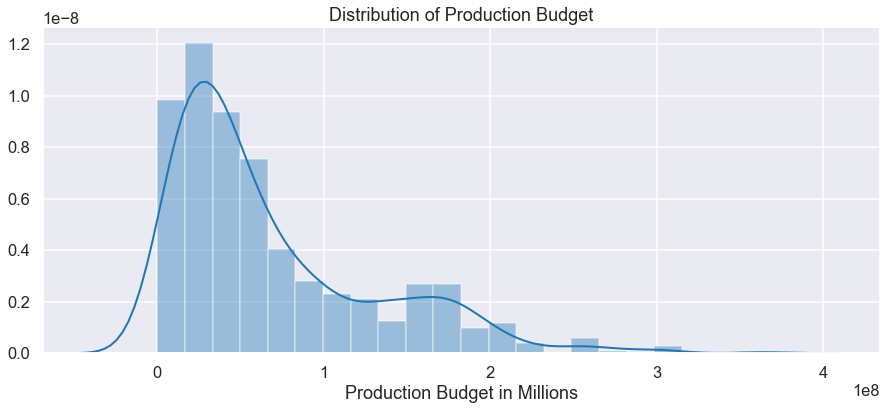

In [487]:
#plot production_budget of general trend
plt.figure(figsize = (15, 6))
sns.distplot(full_df['production_budget'], label = 'General')

#set labels
plt.title('Distribution of Production Budget')
plt.xlabel('Production Budget in Millions')

#show
plt.show()

In [488]:
#save
fig.savefig('production_budget_distribution')

Let's obtain a list of top 100 investment so we can later compare this list with top 100 performers and see if they match.

In [489]:
#list of top 100 investments
top_100_budget = full_df[['movie', 'production_budget']].sort_values(by = 'production_budget', ascending = False)[:100]
top_100_budget.head(20)

,movie,production_budget
0,Avengers: Age of Ultron,365000000
3,Spectre,300000000
1,Avengers: Infinity War,300000000
2,Justice League,300000000
5,Solo: A Star Wars Story,275000000
6,John Carter,263700000
9,Batman v Superman: Dawn of Justice,263000000
7,Tangled,260000000
8,Captain America: Civil War,250000000
11,The Hobbit: The Desolation of Smaug,250000000


### Distribution of Profit

Let's take a look at profits generated domestically, internationally, and worldwide.

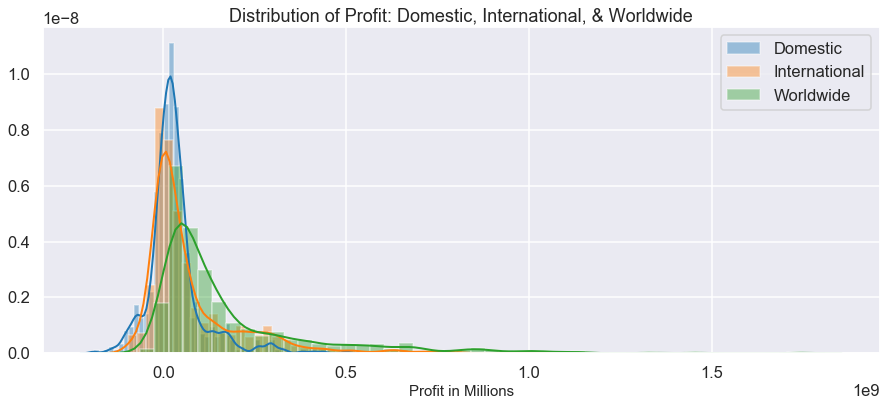

In [490]:
#plot profit
plt.figure(figsize = (15, 6))

#domestic profit
ax1 = sns.distplot(full_df['domestic_profit'], label = 'Domestic')

#international profit
ax2 = sns.distplot(full_df['international_profit'], label = 'International')

#worldwide profit
ax3 = sns.distplot(full_df['worldwide_profit'], label = 'Worldwide')

#set labels
plt.legend()
plt.title('Distribution of Profit: Domestic, International, & Worldwide')
plt.xlabel('Profit in Millions', fontsize = 15)

#show
plt.show()

In [491]:
#save
fig.savefig('profit_distribution.png')

We are interested in worldwide_profit as this reflect the total profit earned. If we have more time, we can analyze each of the attribute with profit generated domestically vs. internationally to see if a movie performs better domestically than internationally and vice versa and why that is.

In [492]:
#list of top 100 performers
top_100_profit = full_df[['movie', 'worldwide_profit', 'domestic_profit', 'international_profit']].sort_values(by = 'worldwide_profit', ascending = False)[:100]
top_100_profit.head(20)

,movie,worldwide_profit,domestic_profit,international_profit
1,Avengers: Infinity War,1744540523,378815482,1065725041
16,Jurassic World,1454943967,437270625,802673342
31,Furious 7,1327179709,163007020,974172689
59,Jurassic World: Fallen Kingdom,1138334005,247719760,720614245
21,Black Panther,1136498912,500059566,436439346
206,Minions,1085631140,262045770,749585370
22,Incredibles 2,1042805359,408581744,434223615
0,Avengers: Age of Ultron,1031099202,94005868,572093334
25,Iron Man 3,1015392272,208992272,606400000
12,The Fate of the Furious,986703796,-24235235,760939031


Comparing top_10_budget movies and top_100_profit movies, they are not the same list. For the first 20 movies, only 8 out of 20 top_budget movies made it into top_profit list. So higher investment into production does not necessarily always mean higher profit. 

### Production Budget vs. Worldwide Profit

In [493]:
#create sub dataframe for production_budget and worldwide_profit of top 100 performers
budget_vs_100_profit = full_df[['production_budget', 'worldwide_profit']].sort_values(by = 'worldwide_profit', ascending = False)[:100]
budget_vs_100_profit.head()

,production_budget,worldwide_profit
1,300000000,1744540523
16,215000000,1454943967
31,190000000,1327179709
59,170000000,1138334005
21,200000000,1136498912


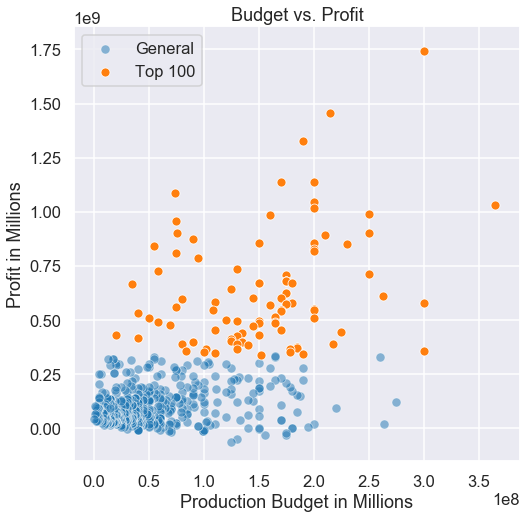

In [494]:
#plot production_budget vs. worldwide_profit for general trend and top 100 performers trend
plt.figure(figsize = (10, 10))

#general
ax1 = sns.scatterplot(x = full_df['production_budget'], y = full_df['worldwide_profit'],
                     label = 'General', alpha = 0.5)
#top 100
ax2 = sns.scatterplot(x = budget_vs_100_profit['production_budget'], y = budget_vs_100_profit['worldwide_profit'],
                     label = 'Top 100')

#set labels
plt.legend()
plt.title('Budget vs. Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Profit in Millions')

#show
plt.show()

In [495]:
#save
fig.savefig('budget_vs_profit.png')

In [496]:
#compare production_budget between general trend and top 100 sucessful trend
print('The average production budget in general is', full_df['production_budget'].mean(), 'million dollars.')
print('The average production budget in top 100 performers is', budget_vs_100_profit['production_budget'].mean(), 'million dollars.')

The average production budget in general is 68150400.0 million dollars.
The average production budget in top 100 performers is 150670000.0 million dollars.


This plot tells us the same thing as above, higher investment does not always guarantee higher profit. We need to investigate this further to find out how much is the minimum budget requirement to create a movie.

### Production Budget vs. Profit

In [497]:
#create sub dataframe for budget_range and worldwide_profit of top 100 performers
budget_range_vs_100_profit = full_df[['budget_range', 'worldwide_profit']].sort_values(by = 'worldwide_profit', ascending = False)[:100]
budget_range_vs_100_profit.head()

,budget_range,worldwide_profit
1,>200M,1744540523
16,>200M,1454943967
31,100-200M,1327179709
59,100-200M,1138334005
21,100-200M,1136498912


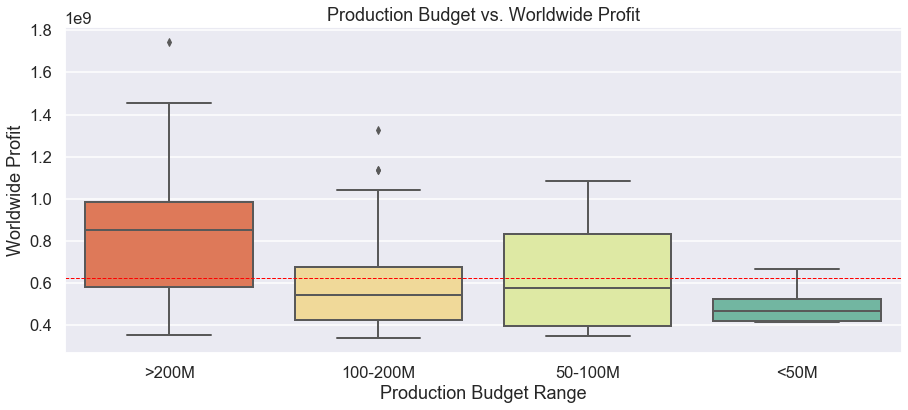

In [498]:
#set values
x = budget_range_vs_100_profit['budget_range']
y = budget_range_vs_100_profit['worldwide_profit']

#plot budget_range vs. worldwide_profit of the top 100 performers
plt.figure(figsize = (15, 6))
sns.boxplot(x, y, palette = 'Spectral')
plt.axhline(budget_range_vs_profit['worldwide_profit'].mean(), ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Production Budget vs. Worldwide Profit')
plt.xlabel('Production Budget Range')
plt.ylabel('Worldwide Profit')

#show
plt.show()

In [499]:
#save 
fig.savefig('budget_range_vs_100_profit.png')

From the boxplot, although the majority of the movies fall within the pattern of higher production budget = higher worldwide profit, we observe that movies in the <50M and 50M-100M budget_range contain outliers that outperformed those in 100-200M.

This analysis reaffirms to us once again that higher investment does not always generate higher ROI as 100-200M movies is outperformed by 50-100M. We recommend that our production budget for our future to be in this range (50-100M).

## Question 2: What kind of movie contents, in term of genre, source, creative type, production method, perform the best?

### Distribution of Genre

In [533]:
#genre_distribution values
y_values = full_df['genre'].value_counts(ascending=False)
x_values = y_values.index

y_values

Adventure              129
Comedy                 107
Action                 103
Drama                   96
Thriller/Suspense       81
Horror                  56
Romantic Comedy         22
Black Comedy            12
Musical                 11
Western                  5
Concert/Performance      3
Name: genre, dtype: int64

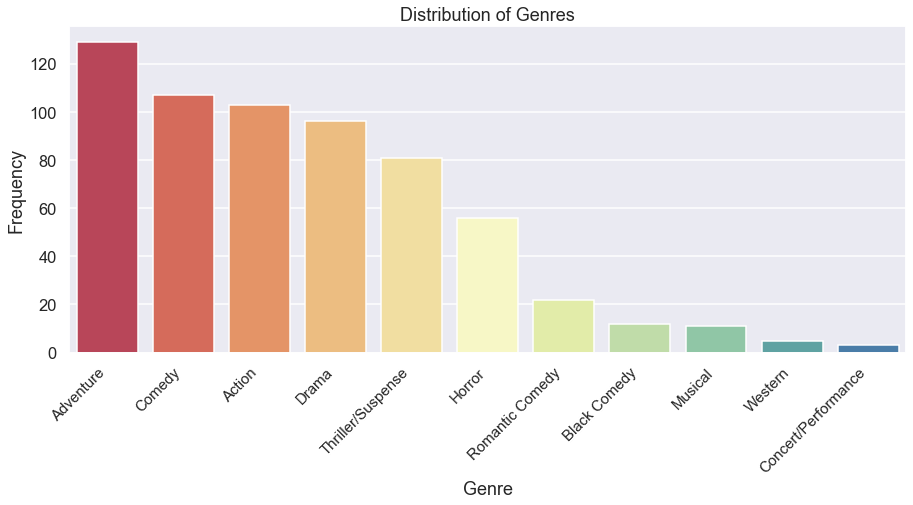

In [534]:
#plot Distribution of Genres
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')

#fix xticks
plt.xticks(rotation=45, ha='right', fontsize = 15)

#show
plt.show()

In [535]:
#save
fig.savefig("genre_distribution.png")

We see that Adventure, Comedy and Action are the most popular genres. Let's see the reason behind this. Is this because these genres generate the most profit?

In [536]:
#create sub dataframe 'genre' vs. 'worldwide_profit' of top 100 performers
genre_vs_100_profit = full_df[['genre', 'worldwide_profit']].sort_values(by = 'worldwide_profit', ascending = False)[:100]
genre_vs_100_profit.head()

,genre,worldwide_profit
1,Action,1744540523
16,Action,1454943967
31,Action,1327179709
59,Action,1138334005
21,Action,1136498912


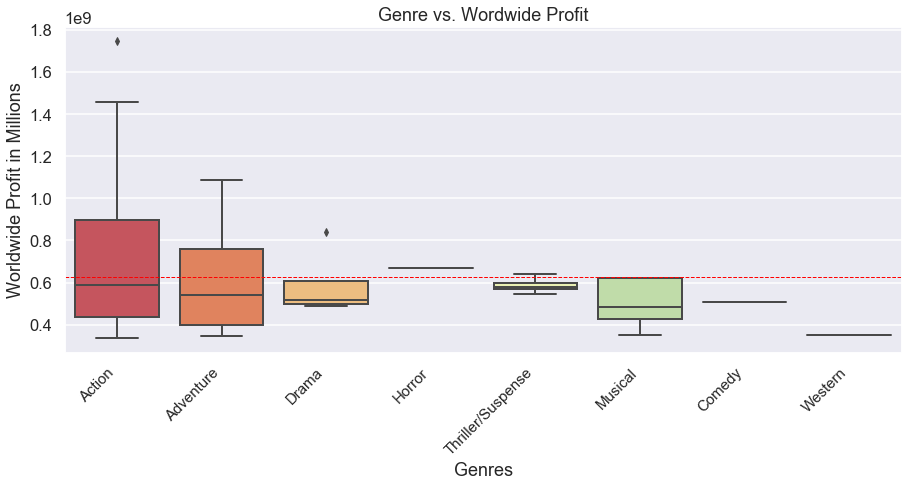

In [537]:
#plot Genre vs. Worldwide Profit
plt.figure(figsize = (15, 6))
sns.boxplot(x = genre_vs_100_profit['genre'], y = genre_vs_100_profit['worldwide_profit'], palette = 'Spectral')
plt.axhline(genre_vs_100_profit['worldwide_profit'].mean(), ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Genre vs. Wordwide Profit')
plt.xlabel('Genres')
plt.ylabel('Worldwide Profit in Millions')

#fix xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [545]:
#save
fig.savefig('genre_vs_100_profit')

Indeed, they do, especially Action and Adventure. Let's next investigate if their high profitability is correlated with their production budget.

In [540]:
#create sub dataframe 'genre' vs. 'production_budget' of top 100 performers
genre_vs_100_budget = full_df[['genre', 'production_budget']].sort_values(by = 'production_budget', ascending = False)[:100]
genre_vs_100_budget.head()

,genre,production_budget
0,Action,365000000
3,Action,300000000
1,Action,300000000
2,Action,300000000
5,Adventure,275000000


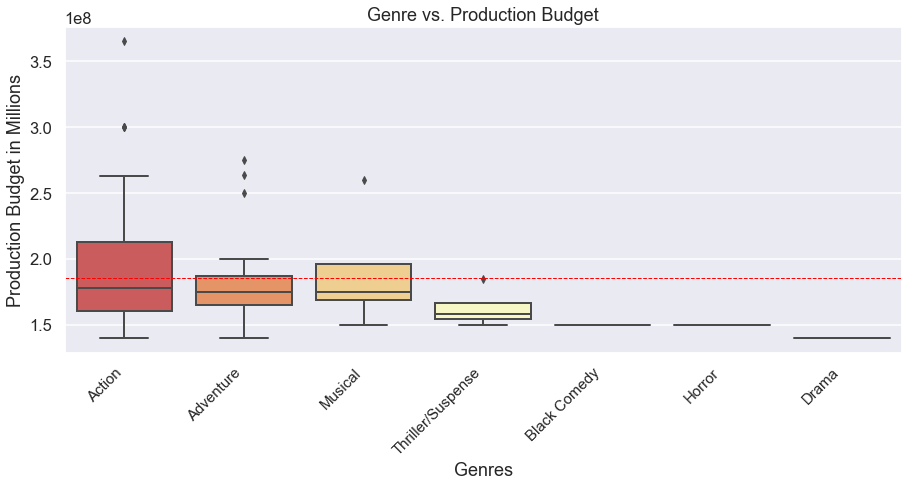

In [543]:
#plot Genre vs. Production Budget
plt.figure(figsize = (15, 6))
sns.boxplot(x = genre_vs_100_budget['genre'], y = genre_vs_100_budget['production_budget'], palette = 'Spectral')
plt.axhline(genre_vs_100_budget['production_budget'].mean(), ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Genre vs. Production Budget')
plt.xlabel('Genres')
plt.ylabel('Production Budget in Millions')

#fix xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [546]:
#save
fig.savefig('genre_vs_100_budget')

We see that Action, Adventure are the most lucrative genres but also costs the most to create. 

Now we are taking a look at Source, Creative Type, Production Method in correlation with Profit. Let's look at the distribution of each of these.

### Source

In [547]:
#source_distribution values
y_values = full_df['source'].value_counts(ascending=False)
x_values = y_values.index

y_values

Original Screenplay                    308
Based on Fiction Book/Short Story      105
Based on Comic/Graphic Novel            45
Based on Real Life Events               42
Based on Factual Book/Article           33
Based on TV                             22
Based on Folk Tale/Legend/Fairytale     17
Remake                                  11
Based on Short Film                     11
Based on Game                           11
Spin-Off                                 9
Based on Religious Text                  4
Based on Play                            3
Based on Musical or Opera                2
Based on Toy                             2
Name: source, dtype: int64

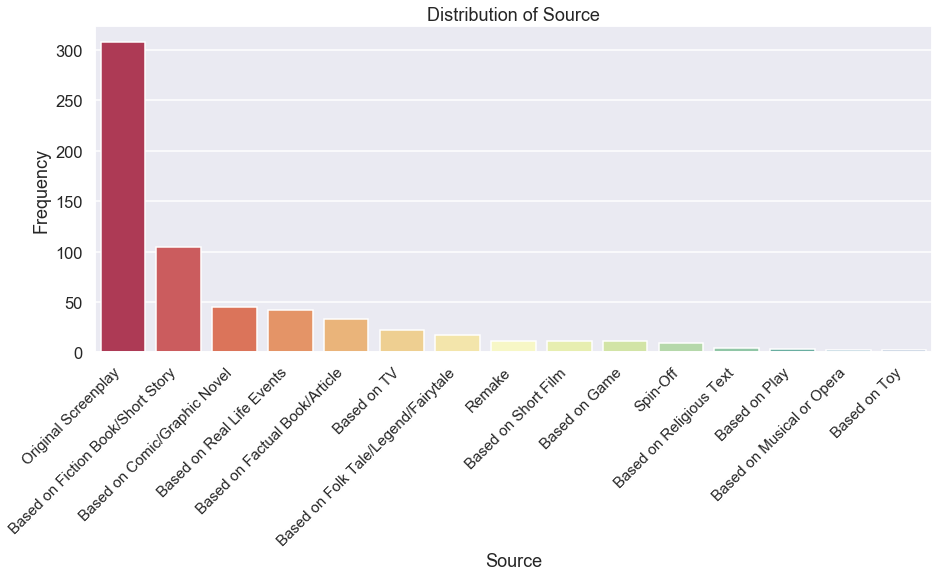

In [548]:
#plot source_distribution
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Source')
plt.xlabel('Source')
plt.ylabel('Frequency')

#fix xticks
plt.xticks(rotation = 45, ha='right', fontsize = 15)
#show
plt.show()

In [549]:
#save
fig.savefig('source_distribution')

We see that Original Screenplay and Fictiona Book/ Short Story are the most popular. But just because they're popular sources doesn't mean that they generate the highest profit. Let's see which one performs the best.

In [550]:
#create sub dataset for 'source' and 'worldwide_profit' for top 100 performers
soure_vs_100_profit = full_df[['source', 'worldwide_profit']].sort_values(by = 'worldwide_profit', ascending = False)[:100]
soure_vs_100_profit.head()

,source,worldwide_profit
1,Based on Comic/Graphic Novel,1744540523
16,Based on Fiction Book/Short Story,1454943967
31,Original Screenplay,1327179709
59,Based on Fiction Book/Short Story,1138334005
21,Based on Comic/Graphic Novel,1136498912


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

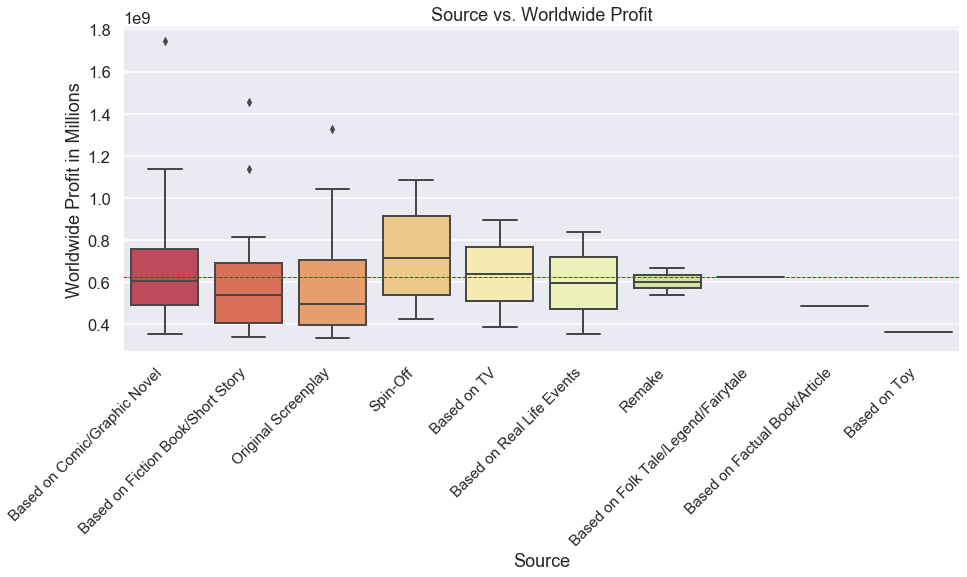

In [559]:
#plot 'source' vs. 'worldwide_profit'
plt.figure(figsize = (15, 6))
sns.boxplot(x = soure_vs_100_profit['source'], y = soure_vs_100_profit['worldwide_profit'], palette = 'Spectral')
plt.axhline(soure_vs_100_profit['worldwide_profit'].mean(), ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Source vs. Worldwide Profit')
plt.xlabel('Source')
plt.ylabel('Worldwide Profit in Millions')

#fix xticks
plt.xticks(rotation = 45, ha='right', fontsize = 15)

In [560]:
#save
fig.savefig('soure_vs_100_profit')

### Creative Type

In [512]:
#creative_type values
y_values = full_df['creative_type'].value_counts(ascending = False)
x_values = y_values.index

y_values

Contemporary Fiction       289
Kids Fiction                73
Science Fiction             66
Dramatization               60
Fantasy                     58
Historical Fiction          42
Super Hero                  33
Factual                      3
Multiple Creative Types      1
Name: creative_type, dtype: int64

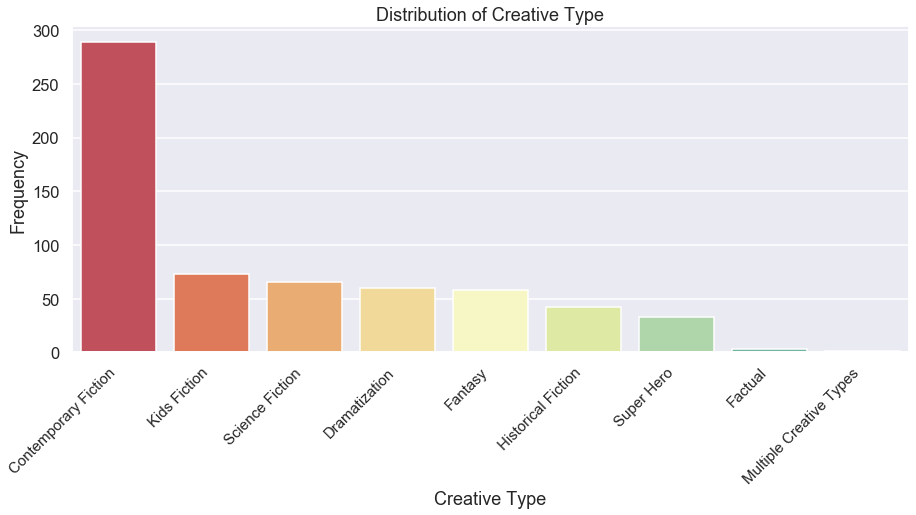

In [513]:
#plot
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette='Spectral')

#set labels
plt.title('Distribution of Creative Type')
plt.xlabel('Creative Type')
plt.ylabel('Frequency')

#fix xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [514]:
#save
fig.savefig('creative_type_distribution.png')

### Distribution of Production Method

In [515]:
#production_method_distribution values
y_values = full_df['production_method'].value_counts(ascending = False)
x_values = y_values.index

y_values

Live Action              513
Digital Animation         57
Animation/Live Action     51
Stop-Motion Animation      4
Name: production_method, dtype: int64

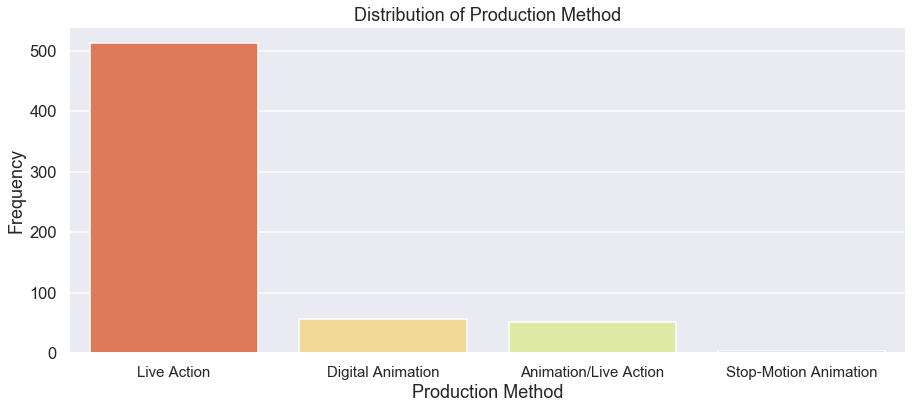

In [516]:
#plot
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Production Method')
plt.xlabel('Production Method')
plt.ylabel('Frequency')

#fix xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [517]:
#save
fig.savefig('production_method_distribution.png')

## Question 3: When is the best time of year to release a movie, in term of month and day of the week?

To answer this question, let's look at Release Time

Let's look at how these movie perform at different lease months:

## Question 4: Can popularity or words of mouth, in term of rating and number of votes, affect the performance of a movie?

Let's look at Rating, Number of Votes (num_votes), and also Studio (studio):

## Question 5: Is runtime a factor in determining the success of a movie?

Finally, let's look at Runtime (runtime_minutes)

In [518]:
#get data statistics
full_df['runtime_minutes'].describe()

count    625.000000
mean     108.531200
std       19.506477
min       40.000000
25%       96.000000
50%      106.000000
75%      120.000000
max      180.000000
Name: runtime_minutes, dtype: float64

In general, movies tend to be in the 108 mins mark. Runtime is range from 40mins to 180mins. Let's look at the plot: 

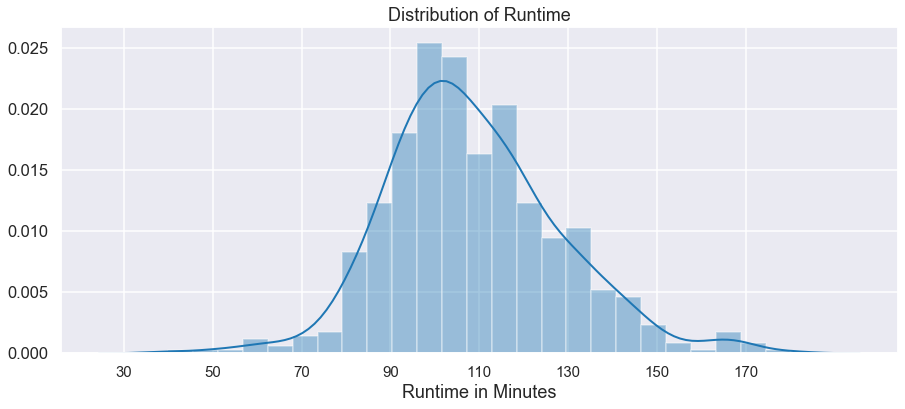

In [519]:
#runtime general distribution
plt.figure(figsize = (15, 6))
sns.distplot(full_df['runtime_minutes'])

#set labels
plt.title('Distribution of Runtime')
plt.xlabel('Runtime in Minutes')

#fix xticks
plt.xticks(np.arange(30, 180, 20), fontsize = 15)

#show
plt.show()

Let's look at how the top 100 performers do differently:

In [520]:
#create sub dataframe for runtime vs. worldwide_profit for top 100 performers
runtime_vs_100_profit = full_df[['runtime_minutes', 'worldwide_profit']].sort_values(by = 'worldwide_profit', ascending = False)[:100]
runtime_vs_100_profit.head()

,runtime_minutes,worldwide_profit
1,149.0,1744540523
16,124.0,1454943967
31,137.0,1327179709
59,128.0,1138334005
21,134.0,1136498912


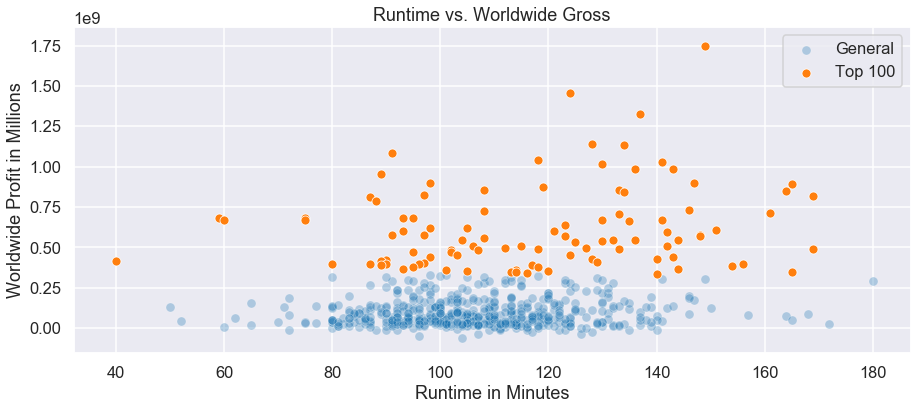

In [521]:
#plot runtime vs. worldwide_profit of top 100 performers
plt.figure(figsize = (15, 6))

#general trend
ax1 = sns.scatterplot(x = full_df['runtime_minutes'], y = full_df['worldwide_profit'], label = 'General', alpha = 0.3)

#top 100 performers trend
ax2 = sns.scatterplot(x = runtime_vs_100_profit['runtime_minutes'], y = runtime_vs_100_profit['worldwide_profit'], label = "Top 100")

#set labels
plt.title('Runtime vs. Worldwide Gross')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Worldwide Profit in Millions')

#show
plt.show()

In [522]:
#save
fig.savefig('runtime_vs_profit')

In [523]:
#comparing average runtime between general trend and top 100 performers successful trend
print('The average runtime in general is', full_df['runtime_minutes'].mean(), 'minutes')
print('The average runtime in top 100 performers is', runtime_vs_100_profit['runtime_minutes'].mean(), 'minutes')

The average runtime in general is 108.5312 minutes
The average runtime in top 100 performers is 117.75 minutes


As we can see, top performers from runtime_vs_100_profit dataset and the plot, top performers do very well in the range of 125mins and longer.

## Extra: Is there one single best studio?

In [524]:
#studio_distribution values
y_values = full_df['studio'].value_counts(ascending=False)[:10]
x_values = y_values.index

y_values

Uni.       97
Fox        87
WB         72
BV         56
Par.       50
Sony       50
WB (NL)    40
LGF        32
LG/S       19
SGem       17
Name: studio, dtype: int64

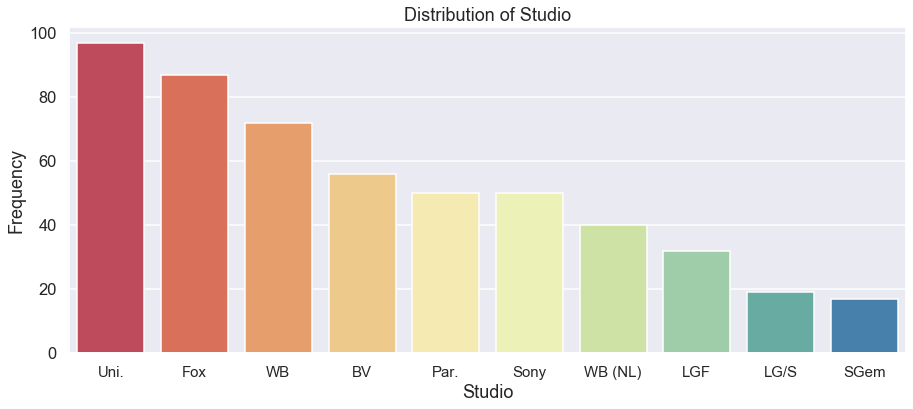

In [525]:
#plot studio distribution
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette = "Spectral")

#set labels
plt.title('Distribution of Studio')
plt.xlabel('Studio')
plt.ylabel('Frequency')

#fix xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [526]:
#save
fig.savefig('studio_distribution.png')

Universal Studio, Fox and Warner Bros are the 3 most popular studios. Is this because they can create the most profitable movies? 

In [527]:
#create sub dataframe for studio and worldwide_profit
studio_vs_100_profit = full_df[['studio', 'worldwide_profit']].sort_values(by = 'worldwide_profit', ascending = False)[:100]
studio_vs_100_profit.head()

,studio,worldwide_profit
1,BV,1744540523
16,Uni.,1454943967
31,Uni.,1327179709
59,Uni.,1138334005
21,BV,1136498912


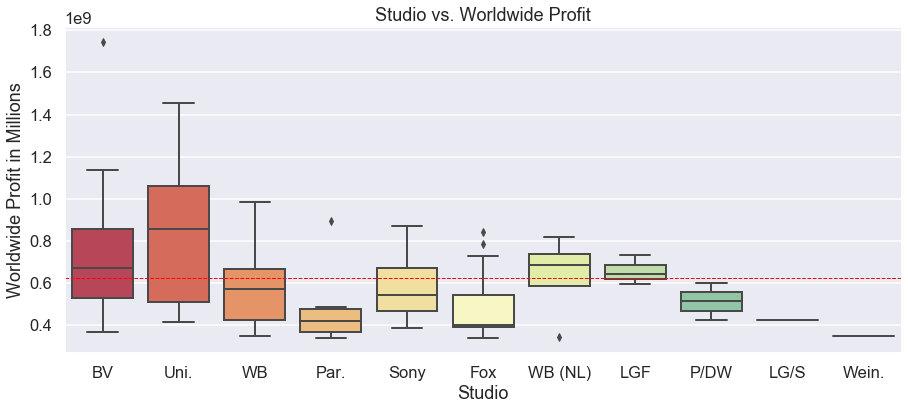

In [528]:
#plot studio vs. worldwide_profit
plt.figure(figsize = (15, 6))
sns.boxplot(x = studio_vs_100_profit['studio'], y = studio_vs_profit['worldwide_profit'], palette = 'Spectral')
plt.axhline(studio_vs_100_profit['worldwide_profit'].mean(), ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Studio vs. Worldwide Profit')
plt.xlabel('Studio')
plt.ylabel('Worldwide Profit in Millions')

#show
plt.show()

Looks like Universal Studio is our winner.

## Extra: What is the most popular language?

In [562]:
#language_distribution
y_values = full_df['language'].value_counts(ascending = False)
x_values = y_values.index

y_values #looks like there is only one

en    625
Name: language, dtype: int64

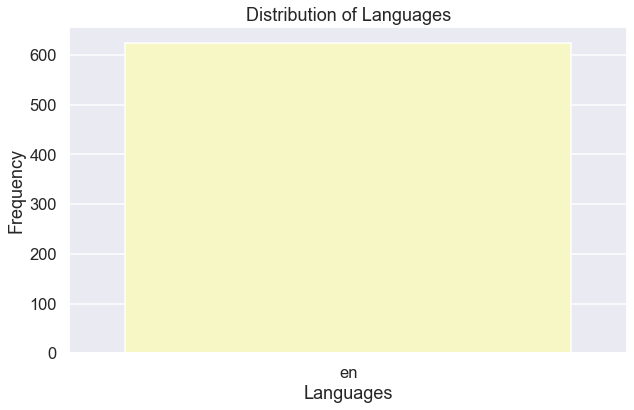

In [563]:
#plot language distribution
plt.figure(figsize = (10,6))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Languages')
plt.xlabel('Languages')
plt.ylabel('Frequency')

#show
plt.show()

This is not very interesting to look at but makes sense. English is the primary language as all the movies we used were made in the US.

# 3. ACTIONABLE INSIGHTS

# **4. CONCLUSION & FUTURE WORKS**

**Future works:**

There are other factors such as star quality, quality of script, special effects, marketing campaign, popularity of the film preceding it (if it's a sequel), competition or lack thereof, competition from non-movie events such as weather or news and sport events. 

Director and writer are also interesting to look at.

Movie researchers has also found that critics have a dual role, where they both influence consumers' movie choice and predict box office performance by reflecting moviegoers' tastes. Unfortunately we won't be investigating these features as they will take up extra time and are all outside the scope of this project.